In [ ]:
# Importing Dependencies
# Data Engineering
import pandas as pd

# Data Cleaning
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating Number of Campsites by Camptype in the WestCoast

In [13]:
# Opening file of WestCoast Facilities Reservations

data = pd.read_csv("Resources/data/West_Coast_activities_facilities_reservations.csv")
data = data.rename(columns={"FacilityID":"facilityid"}).sort_values("facilityid")
data.head()


,facilityid,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,AddressStateCode
7,118440,131,1066.0,ASPEN GROVE CAMPGROUND,-120.774414,40.555019,28,NaN,580,CA,96130
8,119090,131,1108.0,FAREWELL BEND CAMPGROUND,-122.435331,42.916239,59,NaN,2913,OR,97541
9,119140,131,1108.0,UNION CREEK CAMPGROUND - ROGUE RIVER,-122.450000,42.910278,77,NaN,3785,OR,97541
10,119190,131,1108.0,FISH LAKE CAMPGROUND - ROGUE RIVER,-122.318228,42.394214,20,NaN,787,OR,97541
11,119240,131,1108.0,DOE POINT CAMPGROUND,-122.323022,42.392739,29,NaN,1060,OR,97541


In [14]:
# Determining the number of row of the dataset

len(data.index)


892

In [15]:
# Create a DataFrame to be able to join data later

westcoast_facilities = data["facilityid"]
westcoast_facilities = pd.DataFrame(westcoast_facilities).sort_values("facilityid").reset_index()
westcoast_facilities.head()


,index,facilityid
0,7,118440
1,8,119090
2,9,119140
3,10,119190
4,11,119240


In [16]:
# This data represents all the campgrounds(facilityid) and the number of campsites by campsite type

campsites_by_sitetype = pd.read_csv("Resources/data/number_of_campsites_by_sitetype.csv")
campsites_by_sitetype["number_campsite_st"]= campsites_by_sitetype["CampsiteID"]
campsites_by_sitetype = campsites_by_sitetype.rename(columns={"FacilityID":"facilityid"})
campsites_by_sitetype = campsites_by_sitetype.drop(columns=["CampsiteID"]).sort_values("facilityid").reset_index()
campsites_by_sitetype.head()


,index,facilityid,CampsiteType,number_campsite_st
0,0,72417,STANDARD NONELECTRIC,15
1,1,72481,GROUP STANDARD AREA NONELECTRIC,1
2,2,118290,MANAGEMENT,15
3,3,118440,TENT ONLY NONELECTRIC,28
4,4,118990,CABIN ELECTRIC,1


In [17]:
# Campsite by sitetype count 

campsites_by_sitetypes = campsites_by_sitetype.pivot(columns="CampsiteType", 
                                                     values="number_campsite_st").fillna(0).reset_index()
campsites_by_sitetypes.head()


CampsiteType,index,ANCHORAGE,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,Designated Campsite,EQUESTRIAN ELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,...,SHELTER ELECTRIC,SHELTER NONELECTRIC,STANDARD ELECTRIC,STANDARD NONELECTRIC,TENT ONLY ELECTRIC,TENT ONLY NONELECTRIC,WALK TO,YES,YURT,Zone
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#  Campsite by sitetype count on each facilityid

campsite_types_joined = pd.merge(campsites_by_sitetypes, 
                                 campsites_by_sitetype, how='inner', on='index').drop(columns=["index"])
campsite_types_joined.head()


,ANCHORAGE,BOAT IN,CABIN ELECTRIC,CABIN NONELECTRIC,Designated Campsite,EQUESTRIAN ELECTRIC,EQUESTRIAN NONELECTRIC,GROUP EQUESTRIAN,GROUP HIKE TO,GROUP PICNIC AREA,...,STANDARD NONELECTRIC,TENT ONLY ELECTRIC,TENT ONLY NONELECTRIC,WALK TO,YES,YURT,Zone,facilityid,CampsiteType,number_campsite_st
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,72417,STANDARD NONELECTRIC,15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72481,GROUP STANDARD AREA NONELECTRIC,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118290,MANAGEMENT,15
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,0.0,0.0,0.0,0.0,118440,TENT ONLY NONELECTRIC,28
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118990,CABIN ELECTRIC,1


In [19]:
# Use Number_campsites_type to calculate DEMAND

Number_campsites_type = campsite_types_joined.groupby("facilityid").agg(sum)
Number_campsites_type["#tenting"]=Number_campsites_type["STANDARD NONELECTRIC"]+Number_campsites_type["TENT ONLY NONELECTRIC"]+Number_campsites_type["EQUESTRIAN NONELECTRIC"]+Number_campsites_type["TENT ONLY ELECTRIC"]
Number_campsites_type["#group"]=Number_campsites_type["GROUP STANDARD AREA ELECTRIC"]+Number_campsites_type["GROUP STANDARD NONELECTRIC"]+Number_campsites_type["GROUP TENT ONLY AREA NONELECTRIC"]+Number_campsites_type["GROUP STANDARD AREA NONELECTRIC"]+Number_campsites_type["GROUP HIKE TO"]+Number_campsites_type["GROUP WALK TO"]+Number_campsites_type["GROUP STANDARD ELECTRIC"]+Number_campsites_type["GROUP EQUESTRIAN"]+Number_campsites_type["GROUP SHELTER NONELECTRIC"]+Number_campsites_type["GROUP RV AREA NONELECTRIC"]+Number_campsites_type["GROUP PICNIC AREA"]+Number_campsites_type["GROUP SHELTER ELECTRIC"]
Number_campsites_type["#remote"]=Number_campsites_type["WALK TO"]+Number_campsites_type["HIKE TO"]+Number_campsites_type["BOAT IN"]+Number_campsites_type["LOOKOUT"]
Number_campsites_type["#structured_RV"]=Number_campsites_type["STANDARD ELECTRIC"]+Number_campsites_type["RV NONELECTRIC"]+Number_campsites_type["CABIN NONELECTRIC"]+Number_campsites_type["RV ELECTRIC"]+Number_campsites_type["CABIN ELECTRIC"]+Number_campsites_type["YURT"]+Number_campsites_type["SHELTER NONELECTRIC"]+Number_campsites_type["MANAGEMENT"]
Number_campsites_type = Number_campsites_type.reset_index()
Number_campsites_type = Number_campsites_type[["facilityid","#tenting", "#group","#remote","#structured_RV" ]]
Number_campsites_type.head()


,facilityid,#tenting,#group,#remote,#structured_RV
0,72417,15.0,0.0,0.0,0.0
1,72481,0.0,1.0,0.0,0.0
2,118290,0.0,0.0,0.0,15.0
3,118440,28.0,0.0,0.0,0.0
4,118990,0.0,0.0,0.0,1.0


In [20]:
# Saving CSV with number of campsites by type by facilityid

Number_campsites_type.to_csv("Resources/data/Number_campsites_type_by_facilityid.csv", index = False, header=True)


# Creating a dataset of Activities per Campsite (facilityid) in the WestCoast

In [21]:
# Creating a set of data with dummy variables for camping Activities by facilityid

Activities = data["ActivityName"].dropna()
Activities = data["ActivityName"].str.get_dummies(sep=',')
Activities.head()


,ALL TERRAIN/OHV,DIFFICULT HIKING,HORSE,ACCESSIBLE SWIMMING,AMPHITHEATER,AUTO TOURING,BACKPACKING,BEACH CAMPING,BEACHCOMBING,BERRY PICKING,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Activity_Ranking= Activities.sum()
Activity_Ranking

 ALL TERRAIN/OHV         1
 DIFFICULT HIKING        1
 HORSE                   1
ACCESSIBLE SWIMMING      2
AMPHITHEATER            13
                      ... 
WILD HORSE VIEWING       2
WILDERNESS              16
WILDLIFE VIEWING       290
WINTER SPORTS           23
WOOD CUTTING             1
Length: 102, dtype: int64

In [24]:
# DataFrame of the top 20 Activities close to campgrounds

Activity_Ranking = pd.DataFrame(Activity_Ranking)
Activities_Ranking = Activity_Ranking.reset_index().sort_values([0], ascending=False)
Activities_Ranking.head(20)


,index,0
15,CAMPING,788
34,HIKING,612
29,FISHING,595
14,BOATING,345
10,BIKING,302
99,WILDLIFE VIEWING,290
87,SWIMMING SITE,206
94,WATER SPORTS,142
42,HUNTING,120
21,DAY USE AREA,118


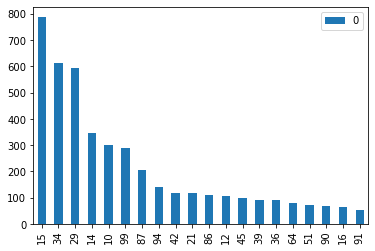

In [25]:
# Bar Graph of the top 20 Activities respresented in most campgrounds

Activities_Ranking.head(20).plot(kind="bar")


In [26]:
# Concat data on Activities by campground (facilityid)

full_activities_data = pd.concat([data,Activities], axis=1)
full_activities_data = full_activities_data.rename(columns={"FacilityID":"facilityid"})
full_activities_data.head()


,facilityid,OrgFacilityID,ParentRecAreaID,FacilityName,FacilityLongitude,FacilityLatitude,NumberofCampsites,ActivityName,NumberofReservations,PostalCode,...,WATER ACTIVITIES,WATER SKIING,WATER SPORTS,WHALE WATCHING,WHITEWATER RAFTING,WILD HORSE VIEWING,WILDERNESS,WILDLIFE VIEWING,WINTER SPORTS,WOOD CUTTING
7,118440,131,1066.0,ASPEN GROVE CAMPGROUND,-120.774414,40.555019,28,NaN,580,CA,...,0,0,0,0,0,0,0,0,0,0
8,119090,131,1108.0,FAREWELL BEND CAMPGROUND,-122.435331,42.916239,59,NaN,2913,OR,...,0,0,0,0,0,0,0,0,0,0
9,119140,131,1108.0,UNION CREEK CAMPGROUND - ROGUE RIVER,-122.450000,42.910278,77,NaN,3785,OR,...,0,0,0,0,0,0,0,0,0,0
10,119190,131,1108.0,FISH LAKE CAMPGROUND - ROGUE RIVER,-122.318228,42.394214,20,NaN,787,OR,...,0,0,0,0,0,0,0,0,0,0
11,119240,131,1108.0,DOE POINT CAMPGROUND,-122.323022,42.392739,29,NaN,1060,OR,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Created a CSV file on the Full_Activities_Data

full_activities_data.to_csv("Resources/data/full_activities_data.csv", index = False, header=True)


# Calculate the demand (#reservations/#campsites) per year (2016-2020)


In [32]:
# Open a datafile on West_Coast_Reservations

westcoastreservations = pd.read_csv("Resources/data/reservations_West_Coast.csv")
westcoastreservations.head()

C:\Users\sduer\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,agency,regiondescription,parentlocation,park,sitetype,facilityid,facilityzip,facilitystate,customerzip,customerstate,customercountry,totalbeforetax,startdate,enddate,orderdate,numberofpeople
0,NPS,Joshua Tree National Park,Pacific West Region,SHEEP PASS GROUP,GROUP TENT ONLY AREA NONELECTRIC,232470.0,92277-3597,CA,90027,CA,USA,100.00,2016-09-03,2016-09-05,2015-10-01,20.0
1,USFS,MAMMOTH RD - FS,INYO NF - FS,PUMICE FLAT GROUP CAMP,GROUP STANDARD NONELECTRIC,231957.0,94301,CA,92301,CA,USA,313.05,2016-06-30,2016-07-03,2015-10-01,30.0
2,USFS,LOS ANGELES RIVER RD - FS,ANGELES NF - FS,MEADOW GROUP CAMPGROUND,GROUP STANDARD NONELECTRIC,233366.0,NaN,CA,91701,CA,USA,81.00,2016-06-24,2016-06-26,2015-10-01,24.0
3,USFS,NACHES RD - FS,OKANOGAN - WENATCHEE NF -FS,SALMON COVE GROUP SITE,GROUP STANDARD AREA NONELECTRIC,234498.0,98937,WA,98942,WA,USA,159.00,2016-09-08,2016-09-11,2015-10-01,27.0
4,USACE,LAKE MENDOCINO,SAN FRANCISCO DIST,BUSHAY RECREATION AREA,GROUP STANDARD NONELECTRIC,233437.0,95482-9404,CA,94565,CA,USA,705.00,2016-09-02,2016-09-05,2015-10-01,40.0


In [33]:
westcoastreservations.columns

Index(['agency', 'regiondescription', 'parentlocation', 'park', 'sitetype',
       'facilityid', 'facilityzip', 'facilitystate', 'customerzip',
       'customerstate', 'customercountry', 'totalbeforetax', 'startdate',
       'enddate', 'orderdate', 'numberofpeople'],
      dtype='object')

In [34]:
westcoastreservations.dtypes

agency                object
regiondescription     object
parentlocation        object
park                  object
sitetype              object
facilityid           float64
facilityzip           object
facilitystate         object
customerzip           object
customerstate         object
customercountry       object
totalbeforetax       float64
startdate             object
enddate               object
orderdate             object
numberofpeople       float64
dtype: object

In [37]:
len(westcoastreservations.index)

3107706

In [38]:
# Change date datatypes, and calculate reservation_days, and days_stay of all reservations data (2016-2020)

westcoastreservations['startdate'] = pd.to_datetime(westcoastreservations["startdate"])
westcoastreservations['enddate'] = pd.to_datetime(westcoastreservations["enddate"])
westcoastreservations['orderdate'] = pd.to_datetime(westcoastreservations["orderdate"])
westcoastreservations["reservation_days"] = westcoastreservations["startdate"]-westcoastreservations["orderdate"]
westcoastreservations["reservation_days"] = pd.to_timedelta(westcoastreservations.reservation_days).dt.total_seconds().astype(int)
westcoastreservations["reservation_days"] = westcoastreservations["reservation_days"]/86400
westcoastreservations["days_stay"] = westcoastreservations["enddate"]-westcoastreservations["startdate"]
westcoastreservations["days_stay"] = pd.to_timedelta(westcoastreservations.days_stay).dt.total_seconds().astype(int)
westcoastreservations["days_stay"] = westcoastreservations["days_stay"]/86400
westcoastreservations.head()


,agency,regiondescription,parentlocation,park,sitetype,facilityid,facilityzip,facilitystate,customerzip,customerstate,customercountry,totalbeforetax,startdate,enddate,orderdate,numberofpeople,reservation_days,days_stay
0,NPS,Joshua Tree National Park,Pacific West Region,SHEEP PASS GROUP,GROUP TENT ONLY AREA NONELECTRIC,232470.0,92277-3597,CA,90027,CA,USA,100.00,2016-09-03,2016-09-05,2015-10-01,20.0,338.0,2.0
1,USFS,MAMMOTH RD - FS,INYO NF - FS,PUMICE FLAT GROUP CAMP,GROUP STANDARD NONELECTRIC,231957.0,94301,CA,92301,CA,USA,313.05,2016-06-30,2016-07-03,2015-10-01,30.0,273.0,3.0
2,USFS,LOS ANGELES RIVER RD - FS,ANGELES NF - FS,MEADOW GROUP CAMPGROUND,GROUP STANDARD NONELECTRIC,233366.0,NaN,CA,91701,CA,USA,81.00,2016-06-24,2016-06-26,2015-10-01,24.0,267.0,2.0
3,USFS,NACHES RD - FS,OKANOGAN - WENATCHEE NF -FS,SALMON COVE GROUP SITE,GROUP STANDARD AREA NONELECTRIC,234498.0,98937,WA,98942,WA,USA,159.00,2016-09-08,2016-09-11,2015-10-01,27.0,343.0,3.0
4,USACE,LAKE MENDOCINO,SAN FRANCISCO DIST,BUSHAY RECREATION AREA,GROUP STANDARD NONELECTRIC,233437.0,95482-9404,CA,94565,CA,USA,705.00,2016-09-02,2016-09-05,2015-10-01,40.0,337.0,3.0


# 2016 WestCoast Camping Reservation Dataset

In [51]:
# 2016 WestCoast Camping Reservation Dataset

data2016_clean = westcoastreservations.loc[(westcoastreservations["startdate"] >= "2016-05-01") 
                                    & (westcoastreservations["enddate"] <= "2016-09-30")]

data2016_demand = data2016_clean.groupby("facilityid")[["totalbeforetax","numberofpeople", 
                                                        "reservation_days","days_stay"]].mean().reset_index()

data2016_demand = data2016_demand.merge(Number_campsites_type, on="facilityid", how="inner")
data2016_demand.head()


,facilityid,totalbeforetax,numberofpeople,reservation_days,days_stay,#tenting,#group,#remote,#structured_RV
0,231947.0,133.947368,35.789474,86.221053,1.789474,0.0,3.0,0.0,0.0
1,231949.0,113.838710,37.774194,80.451613,1.838710,0.0,1.0,0.0,0.0
2,231950.0,113.520000,25.026667,145.320000,2.160000,0.0,5.0,0.0,0.0
3,231951.0,233.436364,54.200000,135.654545,2.309091,0.0,3.0,0.0,0.0
4,231952.0,314.250000,81.250000,162.250000,3.000000,0.0,1.0,0.0,0.0


# 2017 WestCoast Camping Reservation Dataset

In [56]:
# 2017 WestCoast Camping Reservation Dataset

data2017_clean = westcoastreservations.loc[(westcoastreservations["startdate"] >= "2017-05-01") 
                                    & (westcoastreservations["enddate"] <= "2017-09-30")]

data2017_demand = data2017_clean.groupby("facilityid")[["totalbeforetax","numberofpeople", 
                                                        "reservation_days","days_stay"]].mean().sort_values("facilityid").reset_index()

data2017_demand = data2017_demand.merge(Number_campsites_type, on="facilityid", how="inner")
data2017_demand.head()


,facilityid,totalbeforetax,numberofpeople,reservation_days,days_stay,#tenting,#group,#remote,#structured_RV
0,231947.0,140.706522,35.445652,91.847826,1.782609,0.0,3.0,0.0,0.0
1,231949.0,133.333333,38.481481,125.962963,1.962963,0.0,1.0,0.0,0.0
2,231950.0,107.460526,24.565789,132.986842,2.118421,0.0,5.0,0.0,0.0
3,231951.0,198.479167,48.854167,143.604167,2.208333,0.0,3.0,0.0,0.0
4,231952.0,228.300000,44.800000,147.500000,2.500000,0.0,1.0,0.0,0.0


# 2018 WestCoast Camping Reservation Dataset

In [55]:
# 2016 WestCoast Camping Reservation Dataset

data2018_clean = westcoastreservations.loc[(westcoastreservations["startdate"] >= "2018-05-01") 
                                    & (westcoastreservations["enddate"] <= "2018-09-30")]

data2018_demand = data2018_clean.groupby("facilityid")[["totalbeforetax","numberofpeople", 
                                                        "reservation_days","days_stay"]].mean().sort_values("facilityid").reset_index()

data2018_demand = data2018_demand.merge(Number_campsites_type, on="facilityid", how="inner")
data2018_demand.head()


,facilityid,totalbeforetax,numberofpeople,reservation_days,days_stay,#tenting,#group,#remote,#structured_RV
0,231947.0,101.323529,34.852941,92.284314,1.705882,0.0,3.0,0.0,0.0
1,231950.0,115.333333,24.040404,146.919192,2.161616,0.0,5.0,0.0,0.0
2,231951.0,225.131579,38.789474,153.578947,2.394737,0.0,3.0,0.0,0.0
3,231952.0,232.222222,46.000000,96.222222,2.444444,0.0,1.0,0.0,0.0
4,231953.0,60.833333,26.303030,95.939394,3.212121,0.0,2.0,0.0,0.0


# 2019 WestCoast Camping Reservation Dataset

In [57]:
# 2019 WestCoast Camping Reservation Dataset

data2019_clean = westcoastreservations.loc[(westcoastreservations["startdate"] >= "2019-05-01") 
                                    & (westcoastreservations["enddate"] <= "2019-09-30")]

data2019_demand = data2019_clean.groupby("facilityid")[["totalbeforetax","numberofpeople", 
                                                        "reservation_days","days_stay"]].mean().sort_values("facilityid").reset_index()

data2019_demand = data2019_demand.merge(Number_campsites_type, on="facilityid", how="inner")
data2019_demand.head()


,facilityid,totalbeforetax,numberofpeople,reservation_days,days_stay,#tenting,#group,#remote,#structured_RV
0,118440.0,74.715116,4.517442,55.918605,3.825581,28.0,0.0,0.0,0.0
1,119090.0,61.263945,2.889248,59.272433,2.535166,59.0,0.0,0.0,0.0
2,119140.0,59.225205,3.218494,47.325876,2.628635,73.0,0.0,0.0,4.0
3,119190.0,57.875828,3.440397,43.860927,3.950331,17.0,0.0,3.0,0.0
4,119240.0,69.513514,3.127764,53.130221,2.945946,24.0,0.0,5.0,0.0


# 2020 WestCoast Camping Reservation Dataset

In [60]:
# 2020 WestCoast Camping Reservation Dataset

data2020_clean = westcoastreservations.loc[(westcoastreservations["startdate"] >= "2020-05-01") 
                                    & (westcoastreservations["enddate"] <= "2020-09-30")]

data2020_demand = data2020_clean.groupby("facilityid")[["totalbeforetax","numberofpeople", 
                                                        "reservation_days","days_stay"]].mean().sort_values("facilityid").reset_index()


data2020_demand = data2020_demand.merge(Number_campsites_type, on="facilityid", how="inner")
data2020_demand.head()


,facilityid,totalbeforetax,numberofpeople,reservation_days,days_stay,#tenting,#group,#remote,#structured_RV
0,118440.0,56.889706,4.460784,33.644608,3.093137,28.0,0.0,0.0,0.0
1,119090.0,55.609189,3.007757,52.492243,2.437947,59.0,0.0,0.0,0.0
2,119140.0,50.025900,3.053191,39.261866,2.297054,73.0,0.0,0.0,4.0
3,119190.0,55.714433,3.437113,33.204124,2.507216,17.0,0.0,3.0,0.0
4,119240.0,55.660796,3.073507,39.852986,2.531394,24.0,0.0,5.0,0.0


# 2016 WestCoast Camping Reservations by SiteType

In [115]:
# 2016 WestCoast Camping Reservations by SiteType

sitetype2016 = data2016_clean.groupby(["facilityid","sitetype"]).size()
sitetype2016 = pd.DataFrame(sitetype2016).reset_index().rename(columns={0:"fidcounts"}).sort_values('facilityid')
sitetype2016.head()


,facilityid,sitetype,fidcounts
0,231947.0,GROUP TENT ONLY AREA NONELECTRIC,95
1,231949.0,GROUP TENT ONLY AREA NONELECTRIC,31
2,231950.0,GROUP STANDARD NONELECTRIC,10
3,231950.0,GROUP TENT ONLY AREA NONELECTRIC,65
4,231951.0,GROUP TENT ONLY AREA NONELECTRIC,55


In [116]:
# 2016 Campgrounds (facilityid) 

sitetype2016fi= sitetype2016["facilityid"]
sitetype2016fi = pd.DataFrame(sitetype2016fi).reset_index()
sitetype2016fi.head()


,index,facilityid
0,0,231947.0
1,1,231949.0
2,2,231950.0
3,3,231950.0
4,4,231951.0


In [117]:
sitetype2016 = sitetype2016.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()

# 2016 Demand by site type

In [129]:

sitetype2016fia = pd.merge(sitetype2016fi, sitetype2016, how='outer', on='index').reset_index()

sitetype2016fia = sitetype2016fia.groupby("facilityid").agg(sum)

sitetype2016fia["tenting"]=sitetype2016fia["STANDARD NONELECTRIC"]+sitetype2016fia["TENT ONLY NONELECTRIC"]+sitetype2016fia["EQUESTRIAN NONELECTRIC"]+sitetype2016fia["TENT ONLY ELECTRIC"]
sitetype2016fia["group"]=sitetype2016fia["GROUP STANDARD AREA ELECTRIC"]+sitetype2016fia["GROUP STANDARD NONELECTRIC"]+sitetype2016fia["GROUP TENT ONLY AREA NONELECTRIC"]+sitetype2016fia["GROUP STANDARD AREA NONELECTRIC"]+sitetype2016fia["GROUP HIKE TO"]+sitetype2016fia["GROUP WALK TO"]+sitetype2016fia["GROUP STANDARD ELECTRIC"]+sitetype2016fia["GROUP EQUESTRIAN"]+sitetype2016fia["GROUP SHELTER NONELECTRIC"]+sitetype2016fia["GROUP RV AREA NONELECTRIC"]+sitetype2016fia["GROUP PICNIC AREA"]+sitetype2016fia["GROUP SHELTER ELECTRIC"]
sitetype2016fia["remote"]=sitetype2016fia["WALK TO"]+sitetype2016fia["HIKE TO"]+sitetype2016fia["BOAT IN"]+sitetype2016fia["LOOKOUT"]
sitetype2016fia["structured_RV"]=sitetype2016fia["STANDARD ELECTRIC"]+sitetype2016fia["RV NONELECTRIC"]+sitetype2016fia["CABIN NONELECTRIC"]+sitetype2016fia["RV ELECTRIC"]+sitetype2016fia["CABIN ELECTRIC"]+sitetype2016fia["YURT"]+sitetype2016fia["SHELTER NONELECTRIC"]+sitetype2016fia["MANAGEMENT"]
sitetype2016fia = sitetype2016fia.reset_index()
sitetype2016fia = sitetype2016fia[["facilityid","tenting", "group", "remote", "structured_RV"]]

demand_2016 = pd.merge(Number_campsites_type, sitetype2016fia, on="facilityid", how="inner")

demand_2016["tenting_demand"] = demand_2016["tenting"]/ demand_2016["#tenting"]
demand_2016["group_demand"] = demand_2016["group"]/ demand_2016["#group"]
demand_2016["remote_demand"] = demand_2016["remote"]/ demand_2016["#remote"]
demand_2016["structured_RV_demand"] = demand_2016["structured_RV"]/ demand_2016["#structured_RV"]

demand_2016_final = demand_2016[["facilityid","tenting_demand","group_demand","remote_demand","structured_RV_demand"]].fillna(0)
demand_2016_final.head()


,facilityid,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,231947,0.0,31.666667,0.0,0.0
1,231949,0.0,31.000000,0.0,0.0
2,231950,0.0,15.000000,0.0,0.0
3,231951,0.0,18.333333,0.0,0.0
4,231952,0.0,4.000000,0.0,0.0


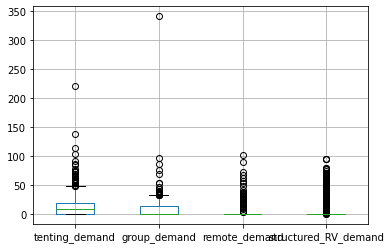

In [137]:
boxplot2016= demand_2016_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot2016

# 2017 WestCoast Camping Reservations by SiteType

In [131]:
# 2017 WestCoast Camping Reservations by SiteType

sitetype2017 = data2017_clean.groupby(["facilityid","sitetype"]).size()
sitetype2017 = pd.DataFrame(sitetype2017).reset_index().rename(columns={0:"fidcounts"}).sort_values('facilityid')
sitetype2017.head()


,facilityid,sitetype,fidcounts
0,231947.0,GROUP TENT ONLY AREA NONELECTRIC,92
1,231949.0,GROUP TENT ONLY AREA NONELECTRIC,27
2,231950.0,GROUP STANDARD NONELECTRIC,13
3,231950.0,GROUP TENT ONLY AREA NONELECTRIC,63
4,231951.0,GROUP TENT ONLY AREA NONELECTRIC,48


In [132]:
# 2017 Campgrounds (facilityid) 

sitetype2017fi= sitetype2017["facilityid"]
sitetype2017fi = pd.DataFrame(sitetype2017fi).reset_index()
sitetype2017fi.head()


,index,facilityid
0,0,231947.0
1,1,231949.0
2,2,231950.0
3,3,231950.0
4,4,231951.0


In [133]:
sitetype2017 = sitetype2017.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()

# 2017 Demand by site type

In [134]:

sitetype2017fia = pd.merge(sitetype2017fi, sitetype2017, how='outer', on='index').reset_index()

sitetype2017fia = sitetype2017fia.groupby("facilityid").agg(sum)

sitetype2017fia["tenting"]=sitetype2017fia["STANDARD NONELECTRIC"]+sitetype2017fia["TENT ONLY NONELECTRIC"]+sitetype2017fia["EQUESTRIAN NONELECTRIC"]+sitetype2017fia["TENT ONLY ELECTRIC"]
sitetype2017fia["group"]=sitetype2017fia["GROUP STANDARD AREA ELECTRIC"]+sitetype2017fia["GROUP STANDARD NONELECTRIC"]+sitetype2017fia["GROUP TENT ONLY AREA NONELECTRIC"]+sitetype2017fia["GROUP STANDARD AREA NONELECTRIC"]+sitetype2017fia["GROUP HIKE TO"]+sitetype2017fia["GROUP WALK TO"]+sitetype2017fia["GROUP STANDARD ELECTRIC"]+sitetype2017fia["GROUP EQUESTRIAN"]+sitetype2017fia["GROUP SHELTER NONELECTRIC"]+sitetype2017fia["GROUP RV AREA NONELECTRIC"]+sitetype2017fia["GROUP PICNIC AREA"]+sitetype2017fia["GROUP SHELTER ELECTRIC"]
sitetype2017fia["remote"]=sitetype2017fia["WALK TO"]+sitetype2017fia["HIKE TO"]+sitetype2017fia["BOAT IN"]+sitetype2017fia["LOOKOUT"]
sitetype2017fia["structured_RV"]=sitetype2017fia["STANDARD ELECTRIC"]+sitetype2017fia["RV NONELECTRIC"]+sitetype2017fia["CABIN NONELECTRIC"]+sitetype2017fia["RV ELECTRIC"]+sitetype2017fia["CABIN ELECTRIC"]+sitetype2017fia["YURT"]+sitetype2017fia["SHELTER NONELECTRIC"]+sitetype2017fia["MANAGEMENT"]
sitetype2017fia = sitetype2017fia.reset_index()
sitetype2017fia = sitetype2017fia[["facilityid","tenting", "group", "remote", "structured_RV"]]

demand_2017 = pd.merge(Number_campsites_type, sitetype2017fia, on="facilityid", how="inner")

demand_2017["tenting_demand"] = demand_2017["tenting"]/ demand_2017["#tenting"]
demand_2017["group_demand"] = demand_2017["group"]/ demand_2017["#group"]
demand_2017["remote_demand"] = demand_2017["remote"]/ demand_2017["#remote"]
demand_2017["structured_RV_demand"] = demand_2017["structured_RV"]/ demand_2017["#structured_RV"]

demand_2017_final = demand_2017[["facilityid","tenting_demand","group_demand","remote_demand","structured_RV_demand"]].fillna(0)
demand_2017_final.head()


,facilityid,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,231947,0.0,30.666667,0.0,0.0
1,231949,0.0,27.000000,0.0,0.0
2,231950,0.0,15.200000,0.0,0.0
3,231951,0.0,16.000000,0.0,0.0
4,231952,0.0,10.000000,0.0,0.0


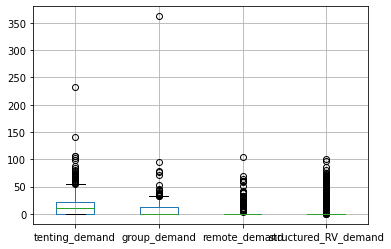

In [136]:
boxplot2017= demand_2017_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot2017

# 2018 WestCoast Camping Reservations by SiteType

In [138]:
# 2018 WestCoast Camping Reservations by SiteType

sitetype2018 = data2018_clean.groupby(["facilityid","sitetype"]).size()
sitetype2018 = pd.DataFrame(sitetype2018).reset_index().rename(columns={0:"fidcounts"}).sort_values('facilityid')
sitetype2018.head()


,facilityid,sitetype,fidcounts
0,231947.0,GROUP TENT ONLY AREA NONELECTRIC,102
1,231950.0,GROUP STANDARD NONELECTRIC,19
2,231950.0,GROUP TENT ONLY AREA NONELECTRIC,80
3,231951.0,GROUP TENT ONLY AREA NONELECTRIC,38
4,231952.0,GROUP RV AREA NONELECTRIC,9


In [139]:
# 2018 Campgrounds (facilityid) 

sitetype2018fi= sitetype2018["facilityid"]
sitetype2018fi = pd.DataFrame(sitetype2018fi).reset_index()
sitetype2018fi.head()


,index,facilityid
0,0,231947.0
1,1,231950.0
2,2,231950.0
3,3,231951.0
4,4,231952.0


In [140]:
sitetype2018 = sitetype2018.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()

# 2018 Demand by site type

In [142]:

sitetype2018fia = pd.merge(sitetype2018fi, sitetype2018, how='outer', on='index').reset_index()

sitetype2018fia = sitetype2018fia.groupby("facilityid").agg(sum)

sitetype2018fia["tenting"]=sitetype2018fia["STANDARD NONELECTRIC"]+sitetype2018fia["TENT ONLY NONELECTRIC"]+sitetype2018fia["EQUESTRIAN NONELECTRIC"]+sitetype2018fia["TENT ONLY ELECTRIC"]
sitetype2018fia["group"]=sitetype2018fia["GROUP STANDARD AREA ELECTRIC"]+sitetype2018fia["GROUP STANDARD NONELECTRIC"]+sitetype2018fia["GROUP TENT ONLY AREA NONELECTRIC"]+sitetype2018fia["GROUP STANDARD AREA NONELECTRIC"]+sitetype2018fia["GROUP HIKE TO"]+sitetype2018fia["GROUP WALK TO"]+sitetype2018fia["GROUP STANDARD ELECTRIC"]+sitetype2018fia["GROUP EQUESTRIAN"]+sitetype2018fia["GROUP SHELTER NONELECTRIC"]+sitetype2018fia["GROUP RV AREA NONELECTRIC"]+sitetype2018fia["GROUP PICNIC AREA"]+sitetype2018fia["GROUP SHELTER ELECTRIC"]
sitetype2018fia["remote"]=sitetype2018fia["WALK TO"]+sitetype2018fia["HIKE TO"]+sitetype2018fia["BOAT IN"]+sitetype2018fia["LOOKOUT"]
sitetype2018fia["structured_RV"]=sitetype2018fia["STANDARD ELECTRIC"]+sitetype2018fia["RV NONELECTRIC"]+sitetype2018fia["CABIN NONELECTRIC"]+sitetype2018fia["RV ELECTRIC"]+sitetype2018fia["CABIN ELECTRIC"]+sitetype2018fia["YURT"]+sitetype2018fia["SHELTER NONELECTRIC"]
sitetype2018fia = sitetype2018fia.reset_index()
sitetype2018fia = sitetype2018fia[["facilityid","tenting", "group", "remote", "structured_RV"]]

demand_2018 = pd.merge(Number_campsites_type, sitetype2018fia, on="facilityid", how="inner")

demand_2018["tenting_demand"] = demand_2018["tenting"]/ demand_2018["#tenting"]
demand_2018["group_demand"] = demand_2018["group"]/ demand_2018["#group"]
demand_2018["remote_demand"] = demand_2018["remote"]/ demand_2018["#remote"]
demand_2018["structured_RV_demand"] = demand_2018["structured_RV"]/ demand_2018["#structured_RV"]

demand_2018_final = demand_2018[["facilityid","tenting_demand","group_demand","remote_demand","structured_RV_demand"]].fillna(0)
demand_2018_final.head()



,facilityid,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,231947,0.0,34.000000,0.0,0.0
1,231950,0.0,19.800000,0.0,0.0
2,231951,0.0,12.666667,0.0,0.0
3,231952,0.0,9.000000,0.0,0.0
4,231953,0.0,16.500000,0.0,0.0


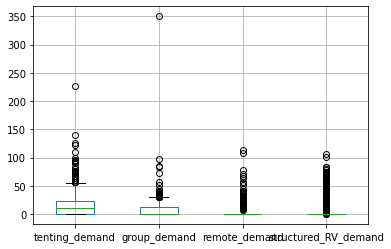

In [143]:
boxplot2018= demand_2018_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot2018

# 2019 WestCoast Camping Reservations by SiteType

In [160]:
# 2019 WestCoast Camping Reservations by SiteType

sitetype2019 = data2019_clean.groupby(["facilityid","sitetype"]).size()
sitetype2019 = pd.DataFrame(sitetype2019).reset_index().rename(columns={0:"fidcounts"}).sort_values('facilityid')
sitetype2019.head()


,facilityid,sitetype,fidcounts
0,118440.0,TENT ONLY NONELECTRIC,172
1,119090.0,STANDARD NONELECTRIC,1237
2,119140.0,RV ELECTRIC,152
3,119140.0,STANDARD NONELECTRIC,1189
4,119190.0,STANDARD NONELECTRIC,265


In [161]:
# 2019 Campgrounds (facilityid) 

sitetype2019fi= sitetype2019["facilityid"]
sitetype2019fi = pd.DataFrame(sitetype2019fi).reset_index()
sitetype2019fi.head()


,index,facilityid
0,0,118440.0
1,1,119090.0
2,2,119140.0
3,3,119140.0
4,4,119190.0


In [162]:
sitetype2019 = sitetype2019.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()

# 2019 Demand by site type

In [164]:

sitetype2019fia = pd.merge(sitetype2019fi, sitetype2019, how='outer', on='index').reset_index()

sitetype2019fia = sitetype2019fia.groupby("facilityid").agg(sum)

sitetype2019fia["tenting"]=sitetype2019fia["STANDARD NONELECTRIC"]+sitetype2019fia["TENT ONLY NONELECTRIC"]+sitetype2019fia["EQUESTRIAN NONELECTRIC"]+sitetype2019fia["TENT ONLY ELECTRIC"]
sitetype2019fia["group"]=sitetype2019fia["GROUP STANDARD AREA ELECTRIC"]+sitetype2019fia["GROUP STANDARD NONELECTRIC"]+sitetype2019fia["GROUP TENT ONLY AREA NONELECTRIC"]+sitetype2019fia["GROUP STANDARD AREA NONELECTRIC"]+sitetype2019fia["GROUP HIKE TO"]+sitetype2019fia["GROUP WALK TO"]+sitetype2019fia["GROUP STANDARD ELECTRIC"]+sitetype2019fia["GROUP EQUESTRIAN"]+sitetype2019fia["GROUP SHELTER NONELECTRIC"]+sitetype2019fia["GROUP RV AREA NONELECTRIC"]+sitetype2019fia["GROUP PICNIC AREA"]+sitetype2019fia["GROUP SHELTER ELECTRIC"]
sitetype2019fia["remote"]=sitetype2019fia["WALK TO"]+sitetype2019fia["HIKE TO"]+sitetype2019fia["BOAT IN"]+sitetype2019fia["LOOKOUT"]
sitetype2019fia["structured_RV"]=sitetype2019fia["STANDARD ELECTRIC"]+sitetype2019fia["RV NONELECTRIC"]+sitetype2019fia["CABIN NONELECTRIC"]+sitetype2019fia["RV ELECTRIC"]+sitetype2019fia["CABIN ELECTRIC"]+sitetype2019fia["YURT"]+sitetype2019fia["SHELTER NONELECTRIC"]
sitetype2019fia = sitetype2019fia.reset_index()
sitetype2019fia = sitetype2019fia[["facilityid","tenting", "group", "remote", "structured_RV"]]

demand_2019 = pd.merge(Number_campsites_type, sitetype2019fia, on="facilityid", how="inner")

demand_2019["tenting_demand"] = demand_2019["tenting"]/ demand_2019["#tenting"]
demand_2019["group_demand"] = demand_2019["group"]/ demand_2019["#group"]
demand_2019["remote_demand"] = demand_2019["remote"]/ demand_2019["#remote"]
demand_2019["structured_RV_demand"] = demand_2019["structured_RV"]/ demand_2019["#structured_RV"]


demand_2019_final = demand_2019[["facilityid","tenting_demand","group_demand","remote_demand","structured_RV_demand"]].fillna(0)
demand_2019_final.head()



,facilityid,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,118440,6.142857,0.0,0.000000,0.0
1,119090,20.966102,0.0,0.000000,0.0
2,119140,16.287671,0.0,0.000000,38.0
3,119190,15.588235,0.0,12.333333,0.0
4,119240,15.083333,0.0,9.000000,0.0


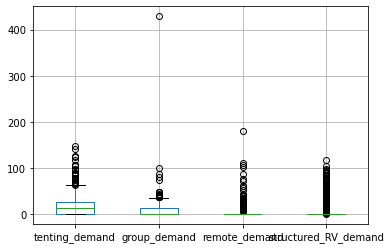

In [165]:
boxplot2019= demand_2019_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot2019

# 2020 WestCoast Camping Reservations by SiteType

In [166]:
# 2020 WestCoast Camping Reservations by SiteType

sitetype2020 = data2020_clean.groupby(["facilityid","sitetype"]).size()
sitetype2020 = pd.DataFrame(sitetype2020).reset_index().rename(columns={0:"fidcounts"}).sort_values('facilityid')
sitetype2020.head()


,facilityid,sitetype,fidcounts
0,118440.0,TENT ONLY NONELECTRIC,408
1,119090.0,STANDARD NONELECTRIC,1676
2,119140.0,RV ELECTRIC,236
3,119140.0,STANDARD NONELECTRIC,2208
4,119190.0,STANDARD NONELECTRIC,395


In [167]:
# 2020 Campgrounds (facilityid) 

sitetype2020fi= sitetype2020["facilityid"]
sitetype2020fi = pd.DataFrame(sitetype2020fi).reset_index()
sitetype2020fi.head()


,index,facilityid
0,0,118440.0
1,1,119090.0
2,2,119140.0
3,3,119140.0
4,4,119190.0


In [168]:
sitetype2020 = sitetype2020.pivot(columns="sitetype", values="fidcounts").fillna(0).reset_index()

# 2020 Demand by site type

In [169]:

sitetype2020fia = pd.merge(sitetype2020fi, sitetype2020, how='outer', on='index').reset_index()

sitetype2020fia = sitetype2020fia.groupby("facilityid").agg(sum)

sitetype2020fia["tenting"]=sitetype2020fia["STANDARD NONELECTRIC"]+sitetype2020fia["TENT ONLY NONELECTRIC"]+sitetype2020fia["EQUESTRIAN NONELECTRIC"]+sitetype2020fia["TENT ONLY ELECTRIC"]
sitetype2020fia["group"]=sitetype2020fia["GROUP STANDARD AREA ELECTRIC"]+sitetype2020fia["GROUP STANDARD NONELECTRIC"]+sitetype2020fia["GROUP TENT ONLY AREA NONELECTRIC"]+sitetype2020fia["GROUP STANDARD AREA NONELECTRIC"]+sitetype2020fia["GROUP HIKE TO"]+sitetype2020fia["GROUP WALK TO"]+sitetype2020fia["GROUP STANDARD ELECTRIC"]+sitetype2020fia["GROUP EQUESTRIAN"]+sitetype2020fia["GROUP SHELTER NONELECTRIC"]+sitetype2020fia["GROUP RV AREA NONELECTRIC"]+sitetype2020fia["GROUP PICNIC AREA"]+sitetype2020fia["GROUP SHELTER ELECTRIC"]
sitetype2020fia["remote"]=sitetype2020fia["WALK TO"]+sitetype2020fia["HIKE TO"]+sitetype2020fia["BOAT IN"]+sitetype2020fia["LOOKOUT"]
sitetype2020fia["structured_RV"]=sitetype2020fia["STANDARD ELECTRIC"]+sitetype2020fia["RV NONELECTRIC"]+sitetype2020fia["CABIN NONELECTRIC"]+sitetype2020fia["RV ELECTRIC"]+sitetype2020fia["CABIN ELECTRIC"]+sitetype2020fia["YURT"]+sitetype2020fia["SHELTER NONELECTRIC"]
sitetype2020fia = sitetype2020fia.reset_index()
sitetype2020fia = sitetype2020fia[["facilityid","tenting", "group", "remote", "structured_RV"]]

demand_2020 = pd.merge(Number_campsites_type, sitetype2020fia, on="facilityid", how="inner")

demand_2020["tenting_demand"] = demand_2020["tenting"]/ demand_2020["#tenting"]
demand_2020["group_demand"] = demand_2020["group"]/ demand_2020["#group"]
demand_2020["remote_demand"] = demand_2020["remote"]/ demand_2020["#remote"]
demand_2020["structured_RV_demand"] = demand_2020["structured_RV"]/ demand_2020["#structured_RV"]


demand_2020_final = demand_2020[["facilityid","tenting_demand","group_demand","remote_demand","structured_RV_demand"]].fillna(0)
demand_2020_final.head()



,facilityid,tenting_demand,group_demand,remote_demand,structured_RV_demand
0,118440,14.571429,0.0,0.0,0.0
1,119090,28.406780,0.0,0.0,0.0
2,119140,30.246575,0.0,0.0,59.0
3,119190,23.235294,0.0,30.0,0.0
4,119240,23.583333,0.0,17.4,0.0


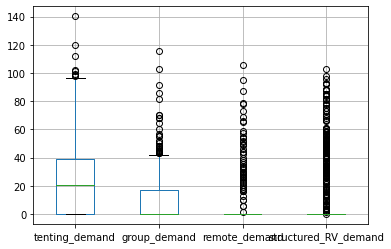

In [170]:
boxplot2020= demand_2020_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])
boxplot2020

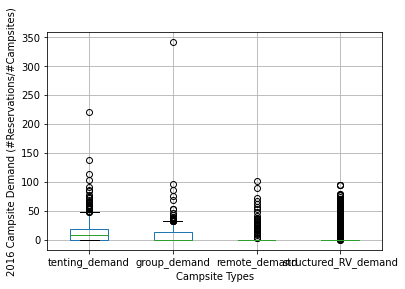

In [209]:
import matplotlib.pyplot as plt

boxplot2016 = demand_2016_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])

boxplot2016.plot(subplots=True, marker='.',markersize=8, 
                 title ="Graph", fontsize = 10, color=['r','b','b','b', 'b'], figsize=(40, 100))

plt.ylabel("2016 Campsite Demand (#Reservations/#Campsites)")
plt.xlabel("Campsite Types")

plt.savefig("Resources/images/demand_2016.png", dpi=500)



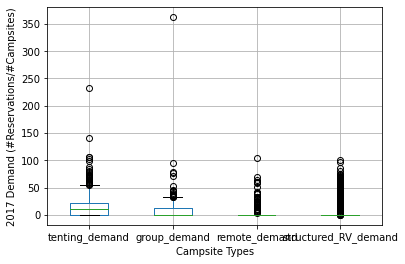

In [210]:
import matplotlib.pyplot as plt

boxplot2017 = demand_2017_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])

boxplot2017.plot(subplots=True, marker='.',markersize=8, 
                 title ="Graph", fontsize = 10, color=['r','b','b','b', 'b'], figsize=(40, 100))

plt.ylabel("2017 Demand (#Reservations/#Campsites)")
plt.xlabel("Campsite Types")

plt.savefig("Resources/images/demand_2017.png", dpi=500)



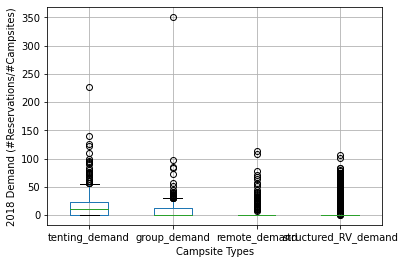

In [211]:
import matplotlib.pyplot as plt

boxplot2018 = demand_2018_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])

boxplot2018.plot(subplots=True, marker='.',markersize=8, 
                 title ="Graph", fontsize = 10, color=['r','b','b','b', 'b'], figsize=(40, 100))

plt.ylabel("2018 Demand (#Reservations/#Campsites)")
plt.xlabel("Campsite Types")

plt.savefig("Resources/images/demand_2018.png", dpi=500)

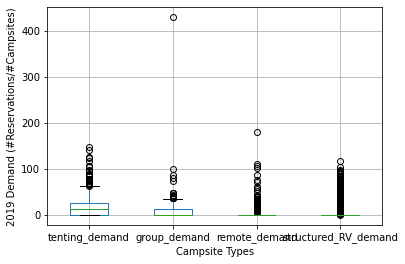

In [212]:
import matplotlib.pyplot as plt

boxplot2019 = demand_2019_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])

boxplot2019.plot(subplots=True, marker='.',markersize=8, 
                 title ="Graph", fontsize = 10, color=['r','b','b','b', 'b'], figsize=(40, 100))

plt.ylabel("2019 Demand (#Reservations/#Campsites)")
plt.xlabel("Campsite Types")

plt.savefig("Resources/images/demand_2019.png", dpi=500)

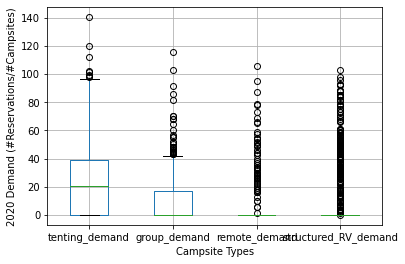

In [213]:
import matplotlib.pyplot as plt

boxplot2020 = demand_2020_final.boxplot(column=['tenting_demand', 'group_demand', 'remote_demand', 'structured_RV_demand'])

boxplot2020.plot(subplots=True, marker='.',markersize=8, 
                 title ="Graph", fontsize = 10, color=['r','b','b','b', 'b'], figsize=(40, 100))

plt.ylabel("2020 Demand (#Reservations/#Campsites)")
plt.xlabel("Campsite Types")

plt.savefig("Resources/images/demand_2020.png", dpi=500)


In [31]:
site_type_complete_analyse.to_csv("Resources/data/site_type_complete_analyse.csv", index = False, header=True)